다음 깃허브를 참조하였습니다. https://github.com/BaekKyunShin/Intro-to-Machine-Learning/blob/master/SVM/SVM.ipynb

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
# from utils import read_data, plot_data, plot_decision_function

In [2]:
red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

def read_points_file(filename):
    points = []
    with open(filename, "r") as f:
        for point in f:
            point = point.strip("\n").split()
            points.append([float(point[0]), float(point[1])])
    return points

def read_data(class_0_file, class_1_file):
    points_label0 = read_points_file(class_0_file)
    points_label1 = read_points_file(class_1_file)
    points = points_label0 + points_label1
    points = np.array(points)

    label0, label1 = [0], [1]
    num_of_label0, num_of_label1 = len(points_label0), len(points_label1)
    labels = label0 * num_of_label0 + label1 * num_of_label1

    return (points, labels)


def plot_data(X_train, y_train, X_test, y_test):

    X = np.concatenate((X_train, X_test))
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(12, 4), dpi=150)

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

def get_colors(y):
    return [data_colors[label] for label in y]

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4), dpi=150)
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()


def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):

    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    # Plot support vectors
    #ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 10,
    #         linewidth=1, facecolors='k', c = 'k', label='Support Vectors')

    #plt.legend(fontsize='small')

In [3]:
!wget https://raw.githubusercontent.com/BaekKyunShin/Intro-to-Machine-Learning/master/SVM/points_class_0.txt
!wget https://raw.githubusercontent.com/BaekKyunShin/Intro-to-Machine-Learning/master/SVM/points_class_0_noise.txt
!wget https://raw.githubusercontent.com/BaekKyunShin/Intro-to-Machine-Learning/master/SVM/points_class_0_nonLinear.txt

!wget https://raw.githubusercontent.com/BaekKyunShin/Intro-to-Machine-Learning/master/SVM/points_class_1.txt
!wget https://raw.githubusercontent.com/BaekKyunShin/Intro-to-Machine-Learning/master/SVM/points_class_1_noise.txt
!wget https://raw.githubusercontent.com/BaekKyunShin/Intro-to-Machine-Learning/master/SVM/points_class_1_nonLinear.txt

--2023-09-13 06:23:54--  https://raw.githubusercontent.com/BaekKyunShin/Intro-to-Machine-Learning/master/SVM/points_class_0.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2164 (2.1K) [text/plain]
Saving to: ‘points_class_0.txt’

points_class_0.txt  100%[===================>]   2.11K  --.-KB/s    in 0s      

2023-09-13 06:23:54 (27.1 MB/s) - ‘points_class_0.txt’ saved [2164/2164]

--2023-09-13 06:23:54--  https://raw.githubusercontent.com/BaekKyunShin/Intro-to-Machine-Learning/master/SVM/points_class_0_noise.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, a

# Linearly Separable Data Without Noise

Displaying data. Close window to continue.


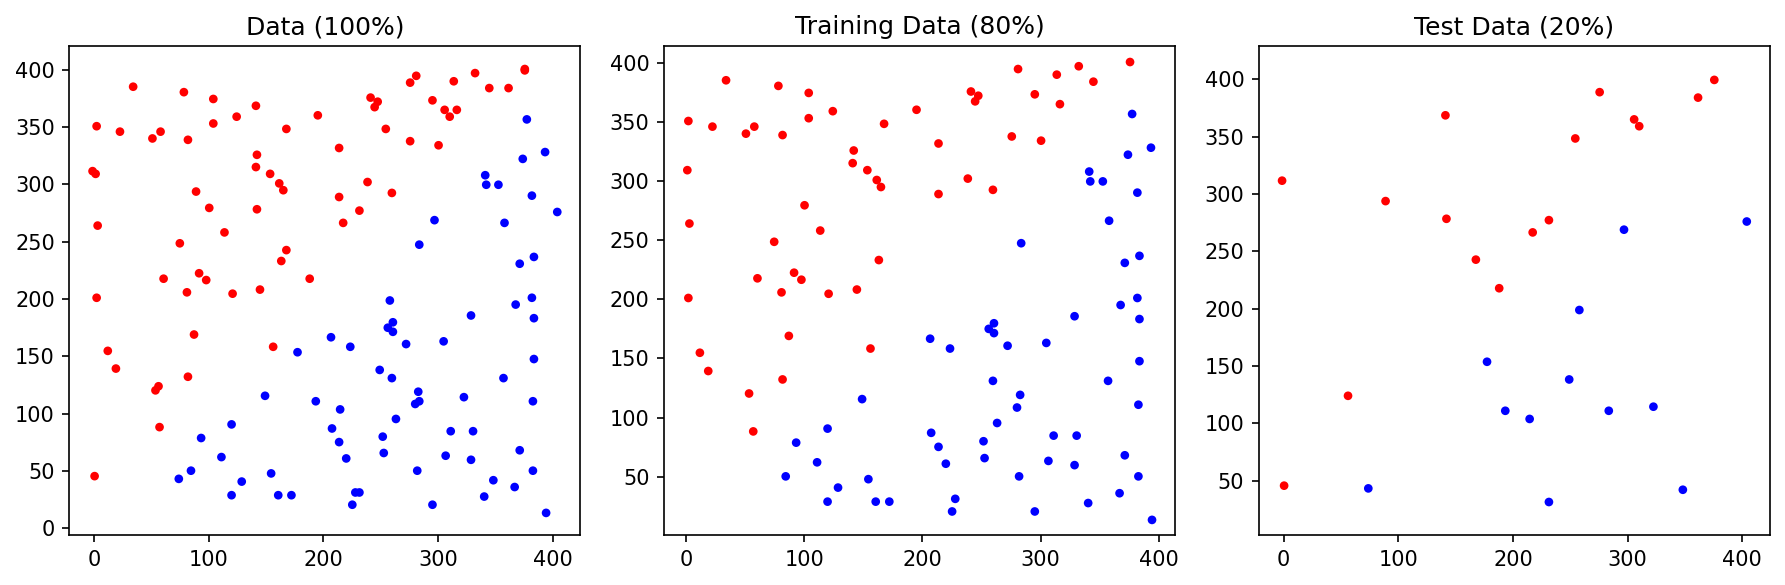

Displaying decision function. Close window to continue.


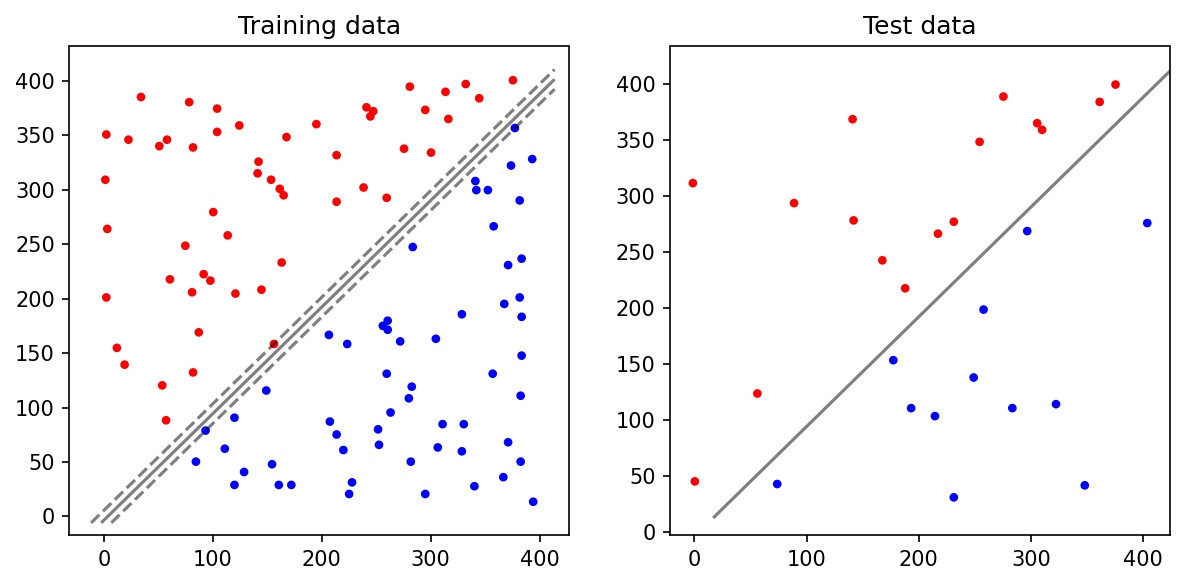

Accuracy: 100.0%


In [4]:
# Read data
x, labels = read_data("points_class_0.txt", "points_class_1.txt")

# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

print("Displaying data. Close window to continue.")
# Plot data
plot_data(X_train, y_train, X_test, y_test)

# make a classifier and fit on training data
clf = svm.SVC(kernel='linear')

# Train classifier
clf.fit(X_train, y_train)

print("Displaying decision function. Close window to continue.")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf)

# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))

# Linearly Separable Data With Noise

Displaying data. Close window to continue.


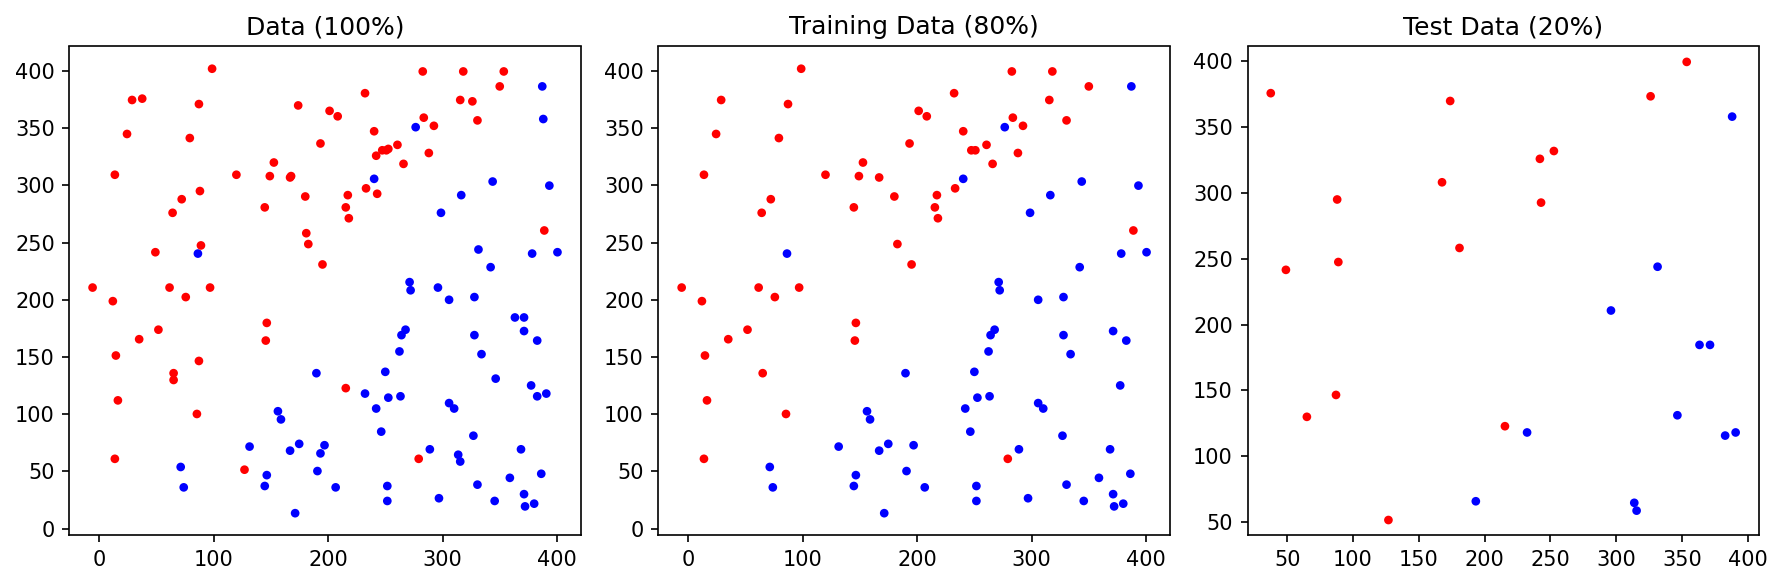

Display decision function (C=1) ...
The SVM classifier will choose a large margin decision boundary at the expense of larger number of misclassifications


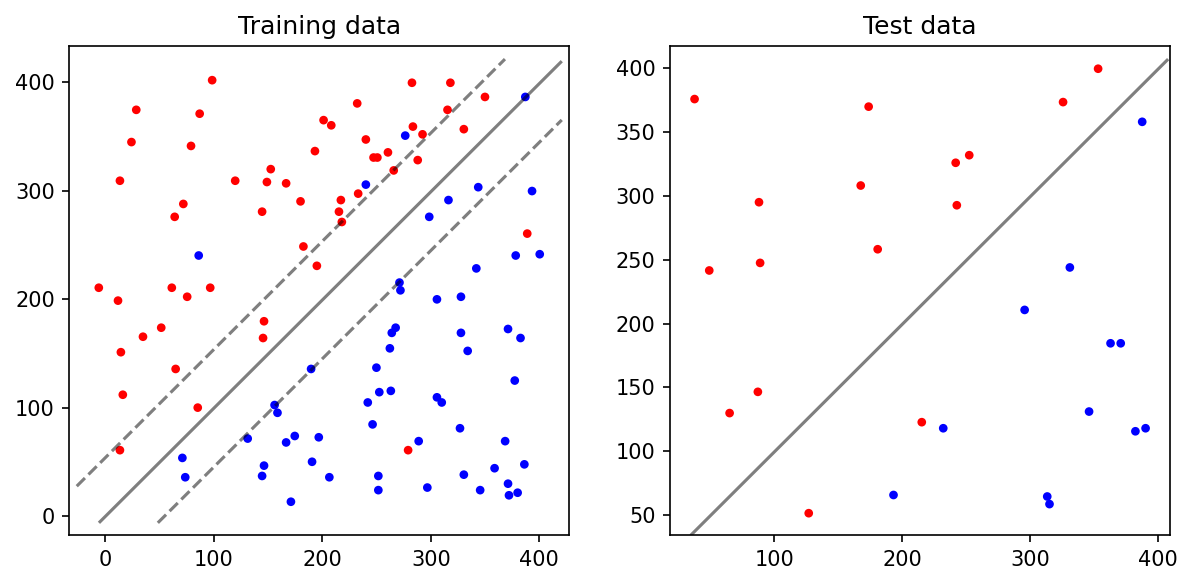

Accuracy(C=1): 92.85714285714286%


Display decision function (C=100) ...
The classifier will choose a low margin decision boundary and try to minimize the misclassifications


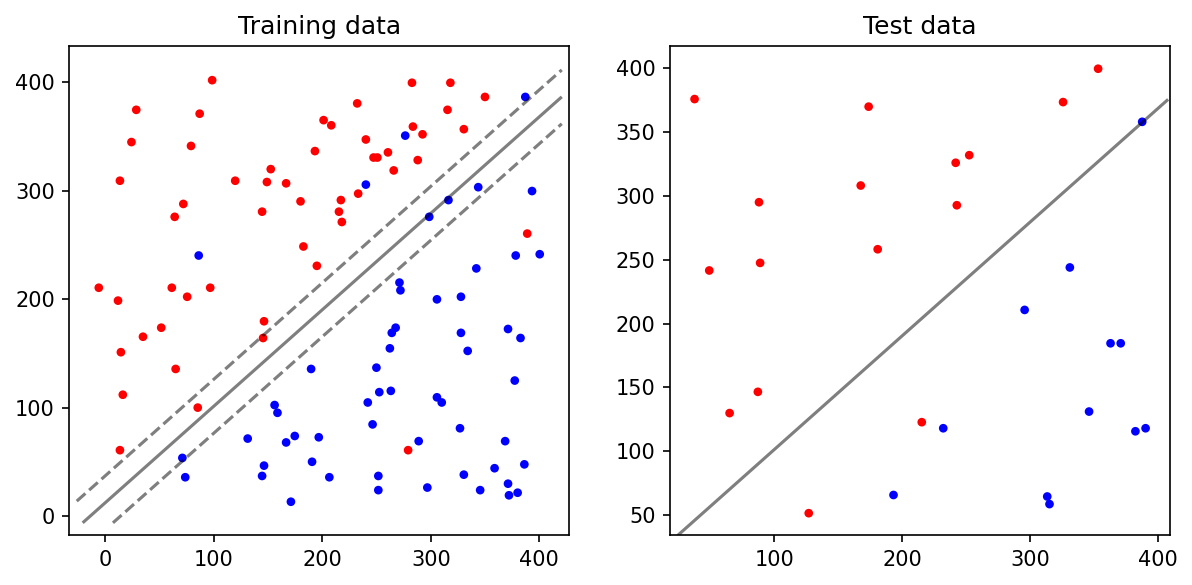

Accuracy(C=100): 89.28571428571429%


In [5]:
# Read data
x, labels = read_data("points_class_0_noise.txt", "points_class_1_noise.txt")

# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

print("Displaying data. Close window to continue.")
# Plot data
plot_data(X_train, y_train, X_test, y_test)

# make a classifier and fit on training data
clf_1 = svm.SVC(kernel='linear', C=1)
clf_1.fit(X_train, y_train)

print("Display decision function (C=1) ...\nThe SVM classifier will choose a large margin decision boundary at the expense of larger number of misclassifications")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_1)

# make a classifier and fit on training data
clf_100 = svm.SVC(kernel='linear', C=100)
clf_100.fit(X_train, y_train)

print("Accuracy(C=1): {}%".format(clf_1.score(X_test, y_test) * 100 ))
print("\n")
print("Display decision function (C=100) ...\nThe classifier will choose a low margin decision boundary and try to minimize the misclassifications")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_100)

print("Accuracy(C=100): {}%".format(clf_100.score(X_test, y_test) * 100 ))

# Make predictions on unseen test data
clf_1_predictions = clf_1.predict(X_test)
clf_100_predictions = clf_100.predict(X_test)

# Nonlinear Data

Displaying data.


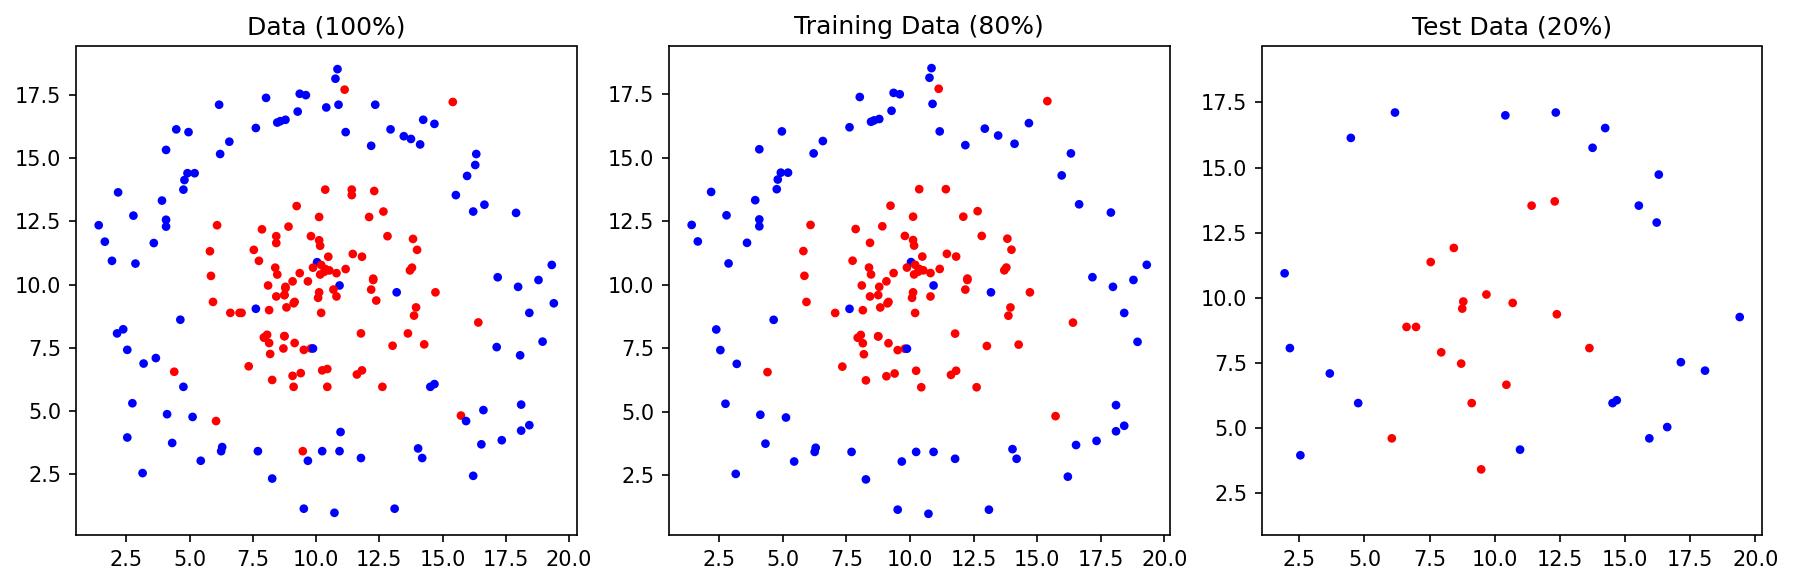

Training SVM ...
Displaying decision function.


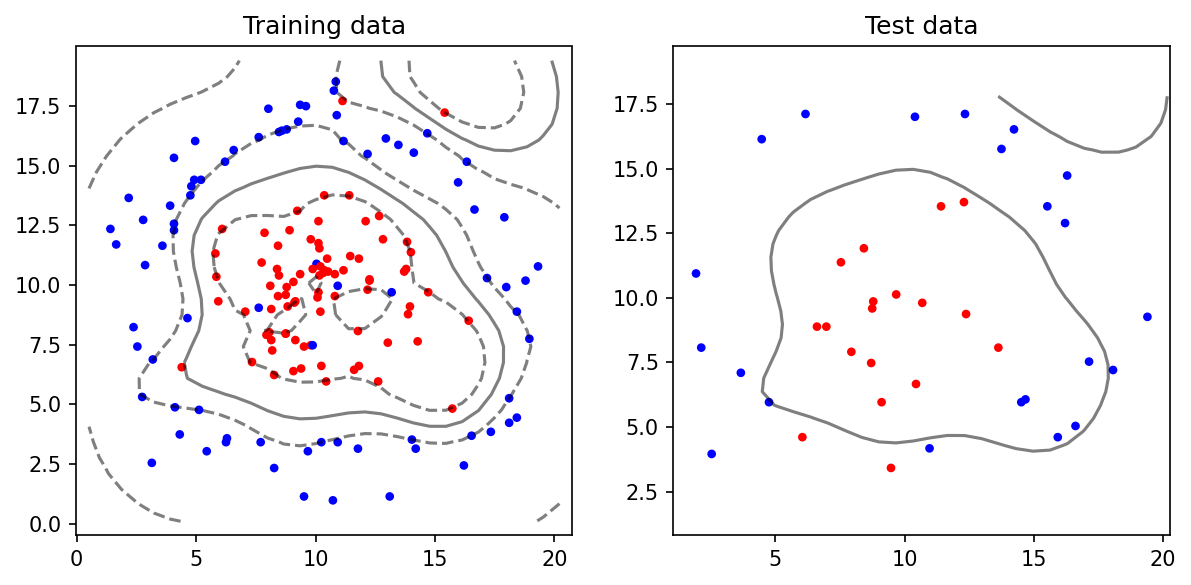

Performing grid search ... 
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
 {'C': 1, 'gamma': 0.01}
Best Estimators:
 SVC(C=1, gamma=0.01)
Displaying decision function for best estimator.


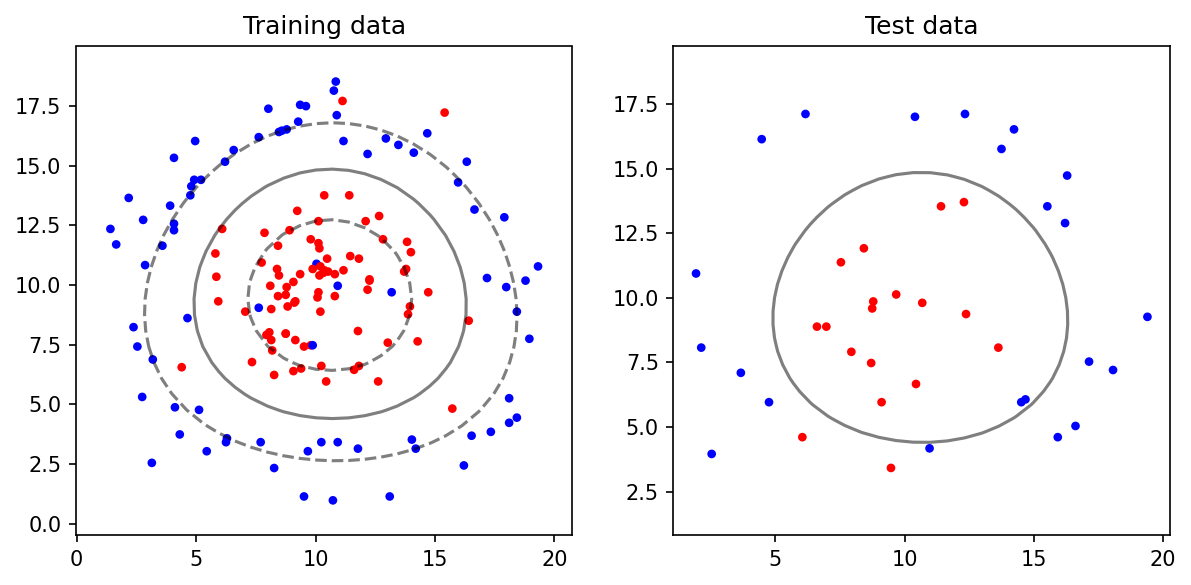

In [6]:
# Read data
x, labels = read_data("points_class_0_nonLinear.txt", "points_class_1_nonLinear.txt")

# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

print("Displaying data.")
# Plot data
plot_data(X_train, y_train, X_test, y_test)

print("Training SVM ...")
# make a classifier
clf = svm.SVC(C = 10.0, kernel='rbf', gamma=0.1)

# Train classifier
clf.fit(X_train, y_train)

# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)

print("Displaying decision function.")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf)

# Grid Search
print("Performing grid search ... ")

# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)

# Train the classifier
clf_grid.fit(X_train, y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

print("Displaying decision function for best estimator.")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_grid)